# **California Housing Data**

> **Dataset Description**

**The dataset for this competition (both train and test) was generated from a deep learning model trained on the California Housing Dataset.**

> **Attribute Description**

**MedInc - Median income for households within a block of houses.**

**HouseAge - Age of a house within a block; a lower number is a newer building.**

**AveRooms - Average number of rooms within a block.**

**AveBedrms - Average number of bedrooms within a block.**

**Population - Total number of people residing within a block.**

**AveOccup - Average number of household members.**

**Longitude - A measure of how far west a house is; a more negative value is farther west.**

**Latitude - A measure of how far north a house is; a higher value is farther north.**

**MedHouseValue - Median house value for households within a block.**

   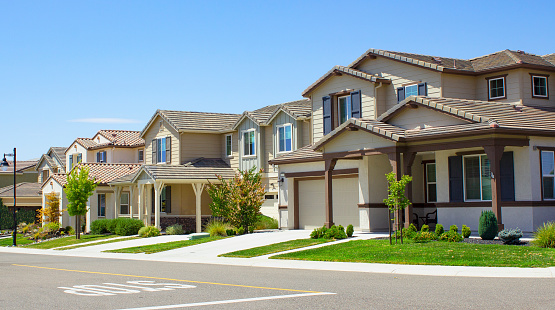

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA - EXPLORATORY DATA ANALYSIS**

**Data Collection**

In [2]:
# Reading the input file
df_train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv')

> # **TRAIN & TEST DATA ANALYSIS**

**Analyzing the Data**

In [3]:
df_train.head()   # displays the first five rows of the dataframe

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
df_test.head()   # displays the first five rows of the dataframe

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [5]:
df_train.shape    # returns a tuple of array dimension that specifies the number of rows and columns

(37137, 10)

In [6]:
df_test.shape    # returns a tuple of array dimension that specifies the number of rows and columns

(24759, 9)

In [7]:
df_train.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [8]:
df_test.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


**Check for missing values and handle them.**

In [9]:
df_train.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
df_test.isna().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

**Check for duplicate values**

In [11]:
df_train.duplicated().any()

False

In [12]:
df_test.duplicated().any()

False

**Check for outliers. If present try to handle them. (Train Data)**

In [13]:
df_train.skew()

id               0.000000
MedInc           1.567604
HouseAge         0.413457
AveRooms         1.301106
AveBedrms       12.965449
Population       5.796582
AveOccup       170.890130
Latitude         0.439251
Longitude       -0.313242
MedHouseVal      0.970856
dtype: float64

id
Skewness: 0.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


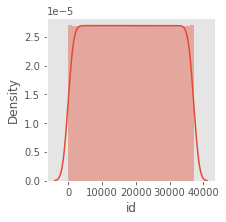

MedInc
Skewness: 1.5675406354569408


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


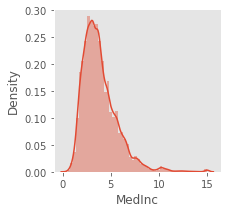

HouseAge
Skewness: 0.4134399594954355


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


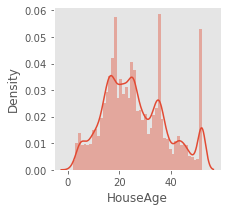

AveRooms
Skewness: 1.3010537441279886


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


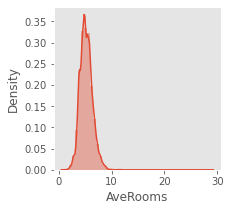

AveBedrms
Skewness: 12.9649251675508


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


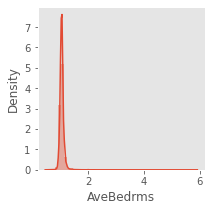

Population
Skewness: 5.796347389167863


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


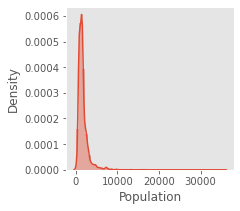

AveOccup
Skewness: 170.88322702875791


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


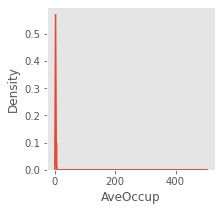

Latitude
Skewness: 0.4392332010578784


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


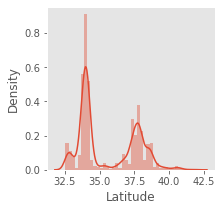

Longitude
Skewness: -0.31322957647378413


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


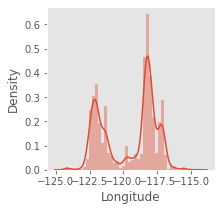

MedHouseVal
Skewness: 0.9708169069984772


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


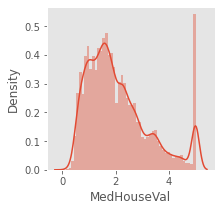

In [14]:
from scipy.stats import skew
for column in df_train:
    print(column)
    print(f"Skewness: {skew(df_train[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(df_train[column])
    plt.grid(False)
    plt.show()

**Handling Skewness**

In [15]:
# Interquantile Range
quantile1=df_train["AveBedrms"].quantile(0.25)
quantile2=df_train["AveBedrms"].quantile(0.75)

In [16]:
df_train["AveBedrms"]=np.where(df_train["AveBedrms"]<quantile1,quantile1,df_train["AveBedrms"])
df_train["AveBedrms"]=np.where(df_train["AveBedrms"]>quantile2,quantile2,df_train["AveBedrms"])

In [17]:
a = round(df_train['AveBedrms'].skew(),6)
print(a)

-0.001763


In [18]:
# Interquantile Range
quantile1=df_train["MedInc"].quantile(0.25)
quantile2=df_train["MedInc"].quantile(0.75)

In [19]:
df_train["MedInc"]=np.where(df_train["MedInc"]<quantile1,quantile1,df_train["MedInc"])
df_train["MedInc"]=np.where(df_train["MedInc"]>quantile2,quantile2,df_train["MedInc"])

In [20]:
b = round(df_train['MedInc'].skew(),6)
print(b)

0.14029


In [21]:
# Interquantile Range
quantile1=df_train["AveOccup"].quantile(0.25)
quantile2=df_train["AveOccup"].quantile(0.75)

In [22]:
df_train["AveOccup"]=np.where(df_train["AveOccup"]<quantile1,quantile1,df_train["AveOccup"])
df_train["AveOccup"]=np.where(df_train["AveOccup"]>quantile2,quantile2,df_train["AveOccup"])

In [23]:
c = round(df_train['AveOccup'].skew(),6)
print(c)

0.028359


In [24]:
# Interquantile Range
quantile1=df_train["AveRooms"].quantile(0.25)
quantile2=df_train["AveRooms"].quantile(0.75)

In [25]:
df_train["AveRooms"]=np.where(df_train["AveRooms"]<quantile1,quantile1,df_train["AveRooms"])
df_train["AveRooms"]=np.where(df_train["AveRooms"]>quantile2,quantile2,df_train["AveRooms"])

In [26]:
d = round(df_train['AveRooms'].skew(),6)
print(d)

0.030626


In [27]:
# Interquantile Range
quantile1=df_train["Population"].quantile(0.25)
quantile2=df_train["Population"].quantile(0.75)

In [28]:
df_train["Population"]=np.where(df_train["Population"]<quantile1,quantile1,df_train["Population"])
df_train["Population"]=np.where(df_train["Population"]>quantile2,quantile2,df_train["Population"])

In [29]:
e = round(df_train['Population'].skew(),6)
print(e)

0.047429


In [30]:
# Interquantile Range
quantile1=df_train["MedHouseVal"].quantile(0.25)
quantile2=df_train["MedHouseVal"].quantile(0.75)

In [31]:
df_train["MedHouseVal"]=np.where(df_train["MedHouseVal"]<quantile1,quantile1,df_train["MedHouseVal"])
df_train["MedHouseVal"]=np.where(df_train["MedHouseVal"]>quantile2,quantile2,df_train["MedHouseVal"])

In [32]:
f = round(df_train['MedHouseVal'].skew(),6)
print(f)

0.152347


**After reducing skewness...**

In [33]:
df_train.skew()

id             0.000000
MedInc         0.140290
HouseAge       0.413457
AveRooms       0.030626
AveBedrms     -0.001763
Population     0.047429
AveOccup       0.028359
Latitude       0.439251
Longitude     -0.313242
MedHouseVal    0.152347
dtype: float64

**Transformation of Target**

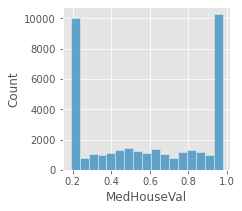

In [34]:
fig,ax = plt.subplots(figsize=(3,3))
sns.histplot(np.log(df_train['MedHouseVal']))
plt.show()

**Correlation (Train Data)**

In [35]:
correlation = df_train.corr()
correlation

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000,0.004177,-0.001248,0.001731,0.000989,0.000401,0.000036,-0.000911,0.001887,-0.003451
MedInc,0.004177,1.000000,-0.122139,0.653031,-0.216002,-0.041100,0.020617,-0.051991,-0.056171,0.642620
HouseAge,-0.001248,-0.122139,1.000000,-0.166690,-0.045041,-0.253413,-0.056795,0.021071,-0.090394,0.062414
AveRooms,0.001731,0.653031,-0.166690,1.000000,-0.089486,-0.089143,0.129683,0.112543,-0.100913,0.280349
AveBedrms,0.000989,-0.216002,-0.045041,-0.089486,1.000000,0.033149,-0.107385,0.007031,0.022016,-0.107993
Population,0.000401,-0.041100,-0.253413,-0.089143,0.033149,1.000000,0.162203,-0.092262,0.094960,-0.054435
AveOccup,0.000036,0.020617,-0.056795,0.129683,-0.107385,0.162203,1.000000,-0.112958,0.140430,-0.202683
Latitude,-0.000911,-0.051991,0.021071,0.112543,0.007031,-0.092262,-0.112958,1.000000,-0.937370,-0.115121
Longitude,0.001887,-0.056171,-0.090394,-0.100913,0.022016,0.094960,0.140430,-0.937370,1.000000,-0.070265
MedHouseVal,-0.003451,0.642620,0.062414,0.280349,-0.107993,-0.054435,-0.202683,-0.115121,-0.070265,1.000000


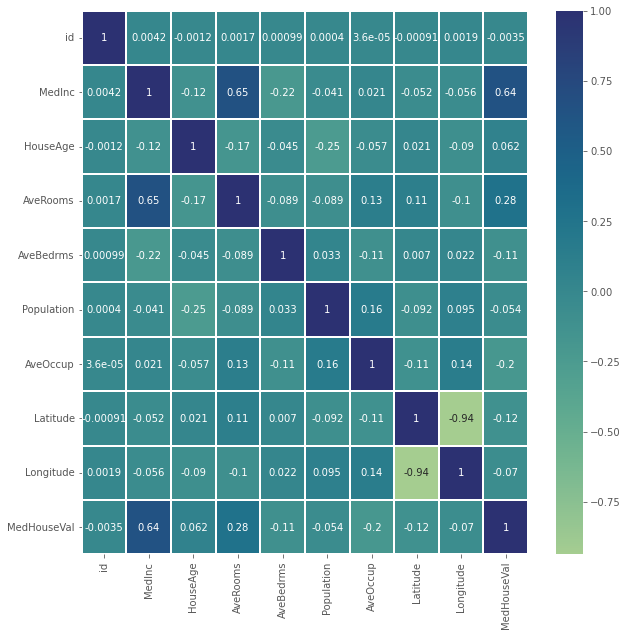

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

**Check for outliers. If present try to handle them. (Test Data)**

In [37]:
df_test.skew()

id              0.000000
MedInc          1.517513
HouseAge        0.403884
AveRooms        3.772418
AveBedrms      28.018172
Population      7.301156
AveOccup      113.054914
Latitude        0.426951
Longitude      -0.292687
dtype: float64

**Handling Skewness**

In [38]:
# Interquantile Range
quantile1=df_test["AveBedrms"].quantile(0.25)
quantile2=df_test["AveBedrms"].quantile(0.75)

In [39]:
df_test["AveBedrms"]=np.where(df_test["AveBedrms"]<quantile1,quantile1,df_test["AveBedrms"])
df_test["AveBedrms"]=np.where(df_test["AveBedrms"]>quantile2,quantile2,df_test["AveBedrms"])

In [40]:
a = round(df_test['AveBedrms'].skew(),6)
print(a)

0.001988


In [41]:
# Interquantile Range
quantile1=df_test["AveOccup"].quantile(0.25)
quantile2=df_test["AveOccup"].quantile(0.75)

In [42]:
df_test["AveOccup"]=np.where(df_test["AveOccup"]<quantile1,quantile1,df_test["AveOccup"])
df_test["AveOccup"]=np.where(df_test["AveOccup"]>quantile2,quantile2,df_test["AveOccup"])

In [43]:
b = round(df_test['AveOccup'].skew(),6)
print(b)

0.023744


In [44]:
# Interquantile Range
quantile1=df_test["AveRooms"].quantile(0.25)
quantile2=df_test["AveRooms"].quantile(0.75)

In [45]:
df_test["AveRooms"]=np.where(df_test["AveRooms"]<quantile1,quantile1,df_test["AveRooms"])
df_test["AveRooms"]=np.where(df_test["AveRooms"]>quantile2,quantile2,df_test["AveRooms"])

In [46]:
c = round(df_test['AveRooms'].skew(),6)
print(c)

0.018701


In [47]:
# Interquantile Range
quantile1=df_test["Population"].quantile(0.25)
quantile2=df_test["Population"].quantile(0.75)

In [48]:
df_test["Population"]=np.where(df_test["Population"]<quantile1,quantile1,df_test["Population"])
df_test["Population"]=np.where(df_test["Population"]>quantile2,quantile2,df_test["Population"])

In [49]:
d = round(df_test['Population'].skew(),6)
print(d)

0.04709


In [50]:
# Interquantile Range
quantile1=df_test["MedInc"].quantile(0.25)
quantile2=df_test["MedInc"].quantile(0.75)

In [51]:
df_test["MedInc"]=np.where(df_test["MedInc"]<quantile1,quantile1,df_test["MedInc"])
df_test["MedInc"]=np.where(df_test["MedInc"]>quantile2,quantile2,df_test["MedInc"])

In [52]:
e = round(df_test['MedInc'].skew(),6)
print(e)

0.148216


**After reducing skewness...**

In [53]:
df_test.skew()

id            0.000000
MedInc        0.148216
HouseAge      0.403884
AveRooms      0.018701
AveBedrms     0.001988
Population    0.047090
AveOccup      0.023744
Latitude      0.426951
Longitude    -0.292687
dtype: float64

**Correlation (Test Data)**

In [54]:
correlation = df_test.corr()
correlation

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,1.000000,0.007245,0.012275,-0.001625,-0.007164,0.011490,-0.004773,0.002873,-0.004015
MedInc,0.007245,1.000000,-0.131015,0.656727,-0.219588,-0.053539,0.002744,-0.049003,-0.056671
HouseAge,0.012275,-0.131015,1.000000,-0.172277,-0.050304,-0.260724,-0.052921,0.014746,-0.081146
AveRooms,-0.001625,0.656727,-0.172277,1.000000,-0.084498,-0.099982,0.104983,0.120960,-0.106704
AveBedrms,-0.007164,-0.219588,-0.050304,-0.084498,1.000000,0.048622,-0.107250,0.012213,0.019614
Population,0.011490,-0.053539,-0.260724,-0.099982,0.048622,1.000000,0.172021,-0.097998,0.100811
AveOccup,-0.004773,0.002744,-0.052921,0.104983,-0.107250,0.172021,1.000000,-0.123099,0.151733
Latitude,0.002873,-0.049003,0.014746,0.120960,0.012213,-0.097998,-0.123099,1.000000,-0.936069
Longitude,-0.004015,-0.056671,-0.081146,-0.106704,0.019614,0.100811,0.151733,-0.936069,1.000000


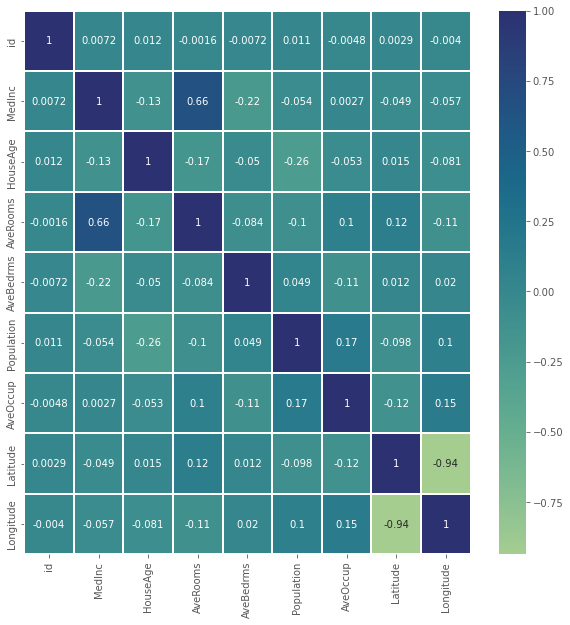

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

**Splitting the Data**

In [56]:
X_train = df_train.iloc[:,1:9]
X_train.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.6023,15.0,4.357522,1.088825,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,5.858597,1.054217,1504.0,3.125313,38.69,-121.22


In [57]:
y_train = df_train.MedHouseVal
y_train.head(2)

0    1.208
1    1.208
Name: MedHouseVal, dtype: float64

In [58]:
X_test = df_test.iloc[:,1:]
X_test.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.59015,35.0,4.966368,1.088295,1318.0,2.844411,39.75,-121.85
1,2.59015,22.0,4.356443,1.088295,1874.0,3.129167,33.95,-118.29


# **MODELLING**

> **A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.**

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(random_state=1)

from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(random_state=1)

from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()

from sklearn.ensemble import VotingRegressor
regressor = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lir', reg3)])

regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
prediction

array([1.14014944, 1.45038869, 2.22585775, ..., 1.40171543, 2.28505558,
       2.39371497])

In [60]:
submission = pd.DataFrame({'id': df_test.id, 'MedHouseVal': prediction})
submission.head()

,id,MedHouseVal
0,37137,1.140149
1,37138,1.450389
2,37139,2.225858
3,37140,2.507619
4,37141,2.122727


In [61]:
submission.to_csv('submission.csv', index=False)